# ISPY2_view_data
BreastDCEDL/ISPY2_view_data.ipynb

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/naomifridman/BreastDCEDL/blob/main/ISPY2_view_data.ipynb)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import sys
from pathlib import Path

In [62]:
# Add this at the beginning of your notebook

# Check if running in Google Colab

if 'google.colab' in str(get_ipython()):
    print("Running in Google Colab")
    # Clone the repository
    !git clone https://github.com/naomifridman/BreastDCEDL.git
    !pip install pydicom

    # Change to the repository directory
    os.chdir('/content/BreastDCEDL')


In [63]:

from PIL import Image
import requests
import argparse
import datetime
import json
import numpy as np
import os
import time
from pathlib import Path


In [64]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [65]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

import os
from __future__ import print_function

import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [66]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [67]:
from glob import glob
#from skimage import io
from sklearn.utils import shuffle

#from nipype.interfaces.ants import N4BiasFieldCorrection
import sys
import os
import ast

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
my_colab=False
my_computer=True
# use samles at git as data
my_clone_git = False

# Base path of the nifti data
base_path="G:\\My Drive\\breast_mri"

In [70]:
# Check if running in Google Colab

if 'google.colab' in str(get_ipython()):
    print("Running in Google Colab")
    # Clone the repository
    !git clone https://github.com/naomifridman/BreastDCEDL.git
    !pip install pydicom

    # Change to the repository directory
    os.chdir('/content/BreastDCEDL')
    
    my_colab=True
    my_clone_git = False
    my_computer=False
    base_path='/content/BreastDCEDL'

In [71]:
# use if data nifti data is downloaded
if my_computer:
    base_path="G:\\My Drive\\breast_mri"
    nifti_path= {'spy2':os.path.join(base_path,"SPY2","vis1","dce_cropped"),
                        'spy1':os.path.join(base_path,"SPY1","vis1","dce"),
                        'duke':os.path.join(base_path,"DUKE","dce")}

    mask_path={'spy2':os.path.join(base_path,"SPY2","vis1","mask"),
                    'spy1':os.path.join(base_path,"SPY1","vis1","mask"),
                    'duke':os.path.join(base_path,"DUKE","mask")}
    
    dcm_path = 'D:\\SPY\\manifest-1636041418053\\'
    
# use for data_samples
if my_clone_git:
    base_path="G:\\My Drive\\breast_mri"
    nifti_path= {'spy2':os.path.join('.',"ISPY2","data_samples","dce"),
                        'spy1':os.path.join('.',"ISPY1","data_samples","dce"),
                        'duke':os.path.join('.',"DUKE","data_samples","dce")}

    mask_path={'spy2':os.path.join('.',"ISPY2","data_samples","mask"),
                    'spy1':os.path.join('.',"ISPY1","data_samples","mask"),
                    'duke':os.path.join('.',"DUKE","data_samples","mask")}
    dcm_path= os.path.join("ISPY2","data_sample","dce")
    
    

if my_colab:
    base_path="G:\\My Drive\\breast_mri"
    nifti_path= {'spy2':os.path.join(base_path,"SPY2","data_samples","dce"),
                        'spy1':os.path.join(base_path,"SPY1","data_samples","dce"),
                        'duke':os.path.join(base_path,"DUKE","data_samples","dce")}

    mask_path={'spy2':os.path.join(base_path,"SPY2","data_samples","mask"),
                    'spy1':os.path.join(base_path,"SPY1","data_samples","mask"),
                    'duke':os.path.join(base_path,"DUKE","data_samples")}
    

In [73]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../',  'utils')))
sys.path.append(os.path.abspath(os.path.join('../', 'utils')))

import data_utils as ds

ds.setup_paths(base_path, nifti_path, mask_path)

{'spy2': 'G:\\My Drive\\breast_mri\\SPY2\\vis1\\dce_cropped', 'spy1': 'G:\\My Drive\\breast_mri\\SPY1\\vis1\\dce', 'duke': 'G:\\My Drive\\breast_mri\\DUKE\\dce'} {'spy2': 'G:\\My Drive\\breast_mri\\SPY2\\vis1\\mask', 'spy1': 'G:\\My Drive\\breast_mri\\SPY1\\vis1\\mask', 'duke': 'G:\\My Drive\\breast_mri\\DUKE\\mask'}


In [74]:
dcm_path

'D:\\SPY\\manifest-1636041418053\\'

# Dicom utilies

In [75]:
import pydicom

# return list of numpy array of voxels
def read_dcm_series(fname, bpath=''):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fpathf = join_path(bpath,fname)

    ll = os.listdir(fpathf)
    pe=[]
    for p in ll:
            d = pydicom.dcmread(join_path(fpathf,p))
            pe.append(d.pixel_array)
    return pe

# returns list of dcm objectys
def read_dcm_series_dicom(fname, bpath=''):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fpathf = join_path(bpath,fname)

    ll = os.listdir(fpathf)
    pe=[]
    for p in ll:
            d = pydicom.dcmread(join_path(fpathf,p))
            pe.append(d)
    return pe

def get_dicom_val(d, tag=(0x0020, 0x0105)):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    val = d.get(tag).value if tag in d else None
    return val

def get_int_dicom_val(d, tag=(0x0020, 0x0105)):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    val = int(float(d.get(tag).value)) if tag in d else None
    return val

In [76]:
def extract_image_positions(dicom):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    """
    Extracts Image Position (Patient) values from a multi-frame DICOM file
    and returns them as a pandas DataFrame.

    Parameters:
    dicom: DICOM file.

    Returns:
    pd.DataFrame: DataFrame containing frame number and (X, Y, Z) positions.
    """
    # Load the DICOM file
    dicom_file = dicom

    # Extract all image positions
    image_positions = []

    if "PerFrameFunctionalGroupsSequence" in dicom_file:
        for frame_idx, frame in enumerate(dicom_file.PerFrameFunctionalGroupsSequence):
            if "PlanePositionSequence" in frame:
                position = list(frame.PlanePositionSequence[0].ImagePositionPatient)  # Convert MultiValue to list
                image_positions.append([frame_idx] + position)

    # Create a DataFrame
    df_positions = pd.DataFrame(image_positions, columns=["Frame", "X", "Y", "Z"])

    return df_positions

In [77]:
dcm_path

'D:\\SPY\\manifest-1636041418053\\'

# Load metadata

In [78]:
df = pd.read_csv('ISPY2_metadata.csv')
df.head()

,pid,pCR,n_xy,n_z,n_times,pre,post_early,post_late,slice_thick,xy_spacing,...,Ganetespib,Carboplatin,MK-2206,T-DM1,Neratinib,ABT 888,Trastuzumab,Paclitaxel,Pertuzumab,test
0,ACRIN-6698-102212,0.0,256.0,80.0,8.0,0.0,2.0,6.0,2.0,0.605500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,ACRIN-6698-103939,0.0,256.0,64.0,7.0,0.0,2.0,5.0,2.5,0.585900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ACRIN-6698-104268,0.0,256.0,80.0,8.0,0.0,2.0,6.0,2.0,0.703125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ACRIN-6698-107700,0.0,256.0,80.0,8.0,0.0,2.0,6.0,2.0,0.664100,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,ACRIN-6698-108969,1.0,256.0,80.0,8.0,0.0,2.0,6.0,2.0,0.703125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Load example and visualize

In [79]:
subject_id = 'ISPY2-550421'

df[df.pid==subject_id].T

,642
pid,ISPY2-550421
pCR,0.0
n_xy,256.0
n_z,160.0
n_times,7.0
pre,0.0
post_early,2.0
post_late,6.0
slice_thick,1.0
xy_spacing,0.688073


# Read DICOM
### Load TCIA metadata

In [83]:
df_meta = pd.read_csv(os.path.join(#'ISPY2',#'data_sample',
                                   'TCIA_metadata','metadata.csv'))
df_meta.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.7695.4164.136727379647...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-102212,1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...,ACRIN-6698ISPY2MRIT3,09-21-2002,ISPY2 VOLSER uni-lateral cropped Analysis Mask,GE MEDICAL SYSTEMS,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,5.29 MB,.\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...,2022-06-14T13:50:23.114
1,1.3.6.1.4.1.14519.5.2.1.7695.4164.150176822414...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-102212,1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...,ACRIN-6698ISPY2MRIT3,09-21-2002,ISPY2 FATIDEAL T2FSEASSET no NP,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,55,29.19 MB,.\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...,2022-06-14T13:50:36.885
2,1.3.6.1.4.1.14519.5.2.1.7695.4164.168989778085...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-102212,1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...,ACRIN-6698ISPY2MRIT3,09-21-2002,ISPY2 3 Plane Scout,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,58,7.93 MB,.\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...,2022-06-14T13:50:58.012
3,1.3.6.1.4.1.14519.5.2.1.7695.4164.221395903073...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-102212,1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...,ACRIN-6698ISPY2MRIT3,09-21-2002,ISPY2 VOLSER uni-lateral cropped SER,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,80,11.01 MB,.\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...,2022-06-14T13:51:05.683
4,1.3.6.1.4.1.14519.5.2.1.7695.4164.101836283294...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-102212,1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...,ACRIN-6698ISPY2MRIT3,09-21-2002,ISPY2 VOLSER uni-lateral cropped PE6,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,80,10.93 MB,.\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...,2022-06-14T13:51:20.16


In [84]:
def get_visit(x):
    if x[-2:] == 'T0':
        return 'T0'
    elif x[-2:] == 'T1':
        return 'T1'
    elif x[-2:] == 'T2':
        return 'T2'
    elif x[-2:] == 'T3':
        return 'T3'

## Filter Pre Treatment visit

In [85]:
df_meta['Study Description'] = df_meta['Study Description'].apply(lambda x: get_visit(x))

df_meta['Study Description'].value_counts()

df_meta=df_meta[df_meta['Study Description']=='T0']

# Analiz few examples

In [104]:
p='ISPY2-208265'
tmp=df_meta[df_meta['Subject ID']==p]
tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
15655,1.3.6.1.4.1.14519.5.2.1.5804873663341903586779...,ISPY2,NO,https://doi.org/10.7937/TCIA.D8Z09T85,ISPY2-208265,1.3.6.1.4.1.14519.5.2.1.1490818355517697508467...,T0,10-08-1999,ISPY2 VOLSER uni-lateral cropped original DCE,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,960,287.64 MB,.\ISPY2\ISPY2-208265\1.3.6.1.4.1.14519.5.2.1.1...,2022-06-18T19:42:28.221


In [105]:
df[df.pid==p].T

,366
pid,ISPY2-208265
pCR,1.0
n_xy,384.0
n_z,160.0
n_times,6.0
pre,0.0
post_early,2.0
post_late,5.0
slice_thick,1.0
xy_spacing,NaN


In [106]:
fname = tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']['File Location'].values[0]
fname

os.path.join (dcm_path, fname)

os.listdir(os.path.join(dcm_path, fname))[:2]

['1-001.dcm', '1-002.dcm']

In [107]:
d=pydicom.dcmread(os.path.join(dcm_path, fname,'1-001.dcm'))
d

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.258797341614580102982827503725388625985
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0012) Instance Creation Date              DA: '19991008'
(0008,0013) Instance Creation Time              TM: '173304.203000'
(0008,0016) SOP Class UID       

```
(0019,1017) [SliceResolution]                   DS: '0.614583'
 (0028,0030) Pixel Spacing                       DS: [0.7291666865, 0.7291666865]   
 (0018,0088) Spacing Between Slices              DS: '1'
```

In [100]:
p='ISPY2-627981'
tmp=df_meta[df_meta['Subject ID']==p]
tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
31268,1.3.6.1.4.1.14519.5.2.1.1931931399220741989939...,ISPY2,NO,https://doi.org/10.7937/TCIA.D8Z09T85,ISPY2-627981,1.3.6.1.4.1.14519.5.2.1.3520131239167374985400...,T0,06-19-1999,ISPY2 VOLSER uni-lateral cropped original DCE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,1760,525.79 MB,.\ISPY2\ISPY2-627981\1.3.6.1.4.1.14519.5.2.1.3...,2022-06-24T19:19:40.875


In [101]:
df[df.pid==p].T

,720
pid,ISPY2-627981
pCR,1.0
n_xy,384.0
n_z,220.0
n_times,8.0
pre,0.0
post_early,2.0
post_late,6.0
slice_thick,1.0
xy_spacing,NaN


In [102]:
fname = tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']['File Location'].values[0]
fname

os.path.join (dcm_path, fname)

os.listdir(os.path.join(dcm_path, fname))[:2]

['1-0001.dcm', '1-0002.dcm']

In [103]:
d=pydicom.dcmread(os.path.join(dcm_path, fname,'1-0001.dcm'))
d

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.175428086260978265495910549773086669209
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0012) Instance Creation Date              DA: '19990619'
(0008,0013) Instance Creation Time              TM: '191120'
(0008,0014) Instance Creator UID       

```
(0019,1017) [SliceResolution]                   DS: '0.614583'
 (0028,0030) Pixel Spacing                       DS: [0.7291666865, 0.7291666865]   
 
 (0028,0030) Pixel Spacing                       DS: [0.9375, 0.9375]
 (0018,0050) Slice Thickness                     DS: '1'
 (0018,0088) Spacing Between Slices              DS: '1'
```

116.64

# Analize few example cases

pds = 'ACRIN-6698-378885'
pdg = 'ISPY2-211408'
pdph = 'ISPY2-550421'

In [329]:
pds = 'ACRIN-6698-378885'
pdg = 'ISPY2-211408'
pdph = 'ISPY2-550421'

### Read Dynamic Contrast MRI for ISPY2-550421

In [330]:
tmp=df_meta[df_meta['Subject ID']==pdph]
tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
27753,1.3.6.1.4.1.14519.5.2.1.2391467408296345373628...,ISPY2,NO,https://doi.org/10.7937/TCIA.D8Z09T85,ISPY2-550421,1.3.6.1.4.1.14519.5.2.1.9261051656703003861157...,T0,04-13-2003,ISPY2 VOLSER uni-lateral cropped original DCE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,1120,150.81 MB,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...,2022-06-23T04:30:18.087


In [331]:
fname = tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']['File Location'].values[0]
fname

join_path(base_path, fname)

os.listdir(join_path(base_path, fname))

'.\\ISPY2\\ISPY2-550421\\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161'

## Dynamic Contrast MRI Scan Details for ISPY2-550421

- **Total Slices:** 1120  
- **Number of MRI Scans:** 7  
- **Slices per MRI Scan:** 1120 / 7 = **160 slices per scan**  

#### **Acquisition Timing**
- The **first scan** is taken **before contrast injection**.  
- The **remaining 6 scans** are acquired **after injection**, with a time interval of approximately **1.5 minutes** between each.  

#### **Processing Steps**
1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  


## 1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  

In [334]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-0001.dcm'))
d

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.112536240787848205223290395402236478818
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.112536240787848205

## Dicom Temporal information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,0060) Laterality                          CS: 'L'
(0020,0100) Temporal Position Identifier        IS: '0'
(0020,0105) Number of Temporal Positions        IS: '6'
(0020,1040) Position Reference Indicator        LO: ''
(0020,1041) Slice Location                      DS: '213'

(0117,1030) Private tag data                    IS: '7'  # Total phases Number
(0117,1031) Private tag data                    DS: '81.832862854'   # Single phase acquisition duration
(0117,1033) Private tag data                    TM: '073158.20'   # Injection time
# phase encoding effective time half way through the acquisition
(0117,1034) Private tag data                    DS: [-73.8535614014, 40.916431427, 122.2864379883, 203.6464233398, 285.006439209, 366.3764343262, 447.7364501953]
```

### **Understanding the Timing of Scans and Contrast Injection in Dynamic Contrast-Enhanced MRI (DCE-MRI)**

In **DCE-MRI**, multiple image acquisitions (phases) are taken over time **before and after** a contrast agent injection. Your DICOM metadata contains important timing information regarding when the scans are taken relative to the contrast injection.

---

## **Temporal Key DICOM Tags**
### **1️⃣ Total Phases Number (0117,1030) - Private Tag**
- **Type:** `IS` (Integer String)
- **Example Value:** `'7'`
- **Meaning:** This represents the **total number of acquisitions (phases)** in the DCE-MRI study, including **one pre-contrast phase** and **multiple post-contrast phases**.

**Interpretation**:  
- `'7'` means **one pre-contrast** and **six post-contrast** phases were acquired.
- These phases are acquired at different time points **before and after** contrast injection.

---

### **2️⃣ Single Phase Acquisition Duration (0117,1031) - Private Tag**
- **Type:** `DS` (Decimal String)
- **Example Value:** `'81.832862854'` (in seconds)
- **Meaning:** Duration of a **single acquisition phase**.

**Interpretation**:  
- Each phase takes **81.83 seconds** to acquire.
- If there are 7 phases, the total scan time will be **approximately** `7 × 81.83 ≈ 573 seconds (9.5 minutes)`.

---

### **3️⃣ Injection Time (0117,1033) - Private Tag**
- **Type:** `TM` (Time)
- **Example Value:** `'073158.20'` (HHMMSS.FF)
- **Meaning:** The **exact scanner clock time** when contrast injection was administered.

**Interpretation**:  
- The contrast injection happened at **07:31:58.20 AM**.
- This time acts as the **reference point** for determining post-contrast acquisitions.

---

### **4️⃣ Effective Acquisition Delay (0117,1034) - Private Tag**
- **Type:** `DS (1-n)` (List of Decimal Strings)
- **Example Value:**
  ```plaintext
  [-73.85, 40.91, 122.28, 203.65, 285.00, 366.37, 447.73]
  ```
- **Meaning:** Time delays (in seconds) relative to **the first post-contrast phase**.

**Interpretation**:  
- **Negative values (`-73.85`)** indicate pre-contrast acquisition (`~74 sec before injection`).
- **Positive values (`40.91`, `122.28`, etc.)** indicate post-contrast acquisitions at these time points after injection.

---

### **5️⃣ Number of Temporal Positions (0020,0105)**
- **Type:** `IS` (Integer String)
- **Example Value:** `'6'`
- **Meaning:** The **number of distinct time points** recorded in this dynamic MRI scan.

**Interpretation**:  
- There are **6 temporal positions**, which correspond to the number of post-contrast scans.

---

## **When Are the Scans Taken**
Based on these values, here’s the approximate timeline of the scan:

| **Phase** | **Time (seconds)** | **Relative to Injection** |
|-----------|------------------|----------------------|
| **Pre-Contrast** | `-73.85` sec | **Before injection** |
| **1st Post-Contrast** | `40.91` sec | **40.91 sec after injection** |
| **2nd Post-Contrast** | `122.28` sec | **122.28 sec after injection** |
| **3rd Post-Contrast** | `203.65` sec | **203.65 sec after injection** |
| **4th Post-Contrast** | `285.00` sec | **285 sec after injection** |
| **5th Post-Contrast** | `366.37` sec | **366.37 sec after injection** |
| **6th Post-Contrast** | `447.73` sec | **447.73 sec after injection** |

---

### **Summary of Timing & Injection Process**
1. **A pre-contrast scan** is taken **~74 seconds before** contrast injection.
2. **Contrast is injected at** `07:31:58.20 AM`.
3. **Post-contrast scans are taken** at different time points after injection (`40.91 sec`, `122.28 sec`, etc.).
4. The **total number of phases** (scans) is **7** (1 pre-contrast + 6 post-contrast).
5. **Each phase acquisition takes** `81.83 sec`.

---

### **Why This Matters in DCE-MRI**
- The **first post-contrast scan** shows **early enhancement** (blood supply to tissues).
- Later phases help differentiate **benign vs. malignant** lesions based on **washout curves**.
- **Temporal Position Identifier (0020,0100)** tells us which phase each image belongs to.


In [335]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-0002.dcm'))
d

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6955632577893836251226799912786684492
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.69556325778938362512

## 2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  

### Dicom spatial information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '213'
```

### slice 1-0002.dcm
```
(0020,0013) Instance Number                     IS: '2'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 61.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '214'
```

### slice 1-1116.dcm
```
(0020,0013) Instance Number                     IS: '1116'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -92.8644638062]
(0020,1041) Slice Location                      DS: '368'

* slicw 1: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 62.1355361938]
* slice 2: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 61.1355361938]
* slice 1116: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, -92.8644638062]

### **Positioning Tags in DICOM**
These tags provide information about the **spatial location and orientation** of the image within the 3D coordinate system of the patient.

---

## **1️⃣ (0020,0032) Image Position (Patient)**
- **Type:** `DS (Decimal String)` – 3 values in millimeters `(X, Y, Z)`
- **Example Value:** `[-20.2284866531, -133.1898132546, 62.1355361938]`
- **Meaning:** This gives the **coordinates of the center of the top-left pixel** (first row, first column) **in the DICOM 3D coordinate system**.

**How It Works:**
- The **DICOM coordinate system** follows:
  - **X**: Left (-) to Right (+)
  - **Y**: Posterior (-) to Anterior (+)
  - **Z**: Inferior (-) to Superior (+)

**Interpretation of the Example:**
- **X = -20.23 mm** → The image is **20.23 mm left** of the reference point.
- **Y = -133.19 mm** → The image is **133.19 mm posterior (towards the back)**.
- **Z = 62.14 mm** → The image is **62.14 mm above the reference point**.

## 2️⃣  (0020,1041) Slice Location in DICOM

🔹 **Tag:** `(0020,1041)`  
🔹 **Type:** `DS (Decimal String)`  
🔹 **Example Value:** `'213'`  
🔹 **Meaning:** Represents the **relative position** of the image slice along the **Z-axis (Superior-Inferior direction)**.

### 🔹 How is Slice Location (0020,1041) Used?

#### **🔹 Relative Positioning**
- `Slice Location` is often used for **sorting slices** in **sequential imaging** (e.g., MRI or CT scans).  
- It provides a **reference value** (not absolute) to determine if a slice is positioned **higher or lower** compared to others.

#### **🔹 Comparison with Image Position (0020,0032)**
- **Image Position (Patient) `(0020,0032)`** provides the **absolute position** in **millimeters** within the patient’s coordinate system.  
- **Slice Location `(0020,1041)`** is often a **simplified or derived value** used for sorting slices within a series.

#### **🔹 Usage in Multi-Phase Imaging (DCE-MRI)**
- Since **(0020,0100) Temporal Position Identifier = '0'**, this is likely the **first temporal position** in a **dynamic contrast-enhanced MRI** scan.  
- The **Slice Locatio



In [336]:
pds = 'ACRIN-6698-378885'
pdg = 'ISPY2-211408'
pdph = 'ISPY2-550421'

# Convert data for: ACRIN-6698-378885

### Read Analysis mask of MRI for ACRIN-6698-378885

In [337]:
tmp=df_meta[df_meta['Subject ID']==pds]
tmp[tmp['Series Description'].str.contains('Analysis Mask')]


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
3642,1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral Analysis Mask,SIEMENS,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,23.68 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:01.088


In [338]:
fname = tmp[tmp['Series Description'].str.contains('Analysis Mask')]['File Location'].values[0]
fname

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803'

In [339]:
base_path = os.path.join("ISPY2","data_sample","dicom_tcia")

In [340]:
org_path = "D:\\SPY\\manifest-1636041418053\\"

In [341]:
os.listdir(base_path)

['ISPY2', 'ACRIN-6698', 'metadata.csv']

In [342]:
mask_dcm=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-1.dcm'))
mask_dcm

ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.120968937471932006539352380190
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Segmentation Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.1209689374719320065

In [343]:
!ls sample_data

ls: cannot access 'sample_data': No such file or directory


### Mask dicom contains the positions of all the slices
```
 (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 160
      
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, -78.4195278883]
      ---------
   ---------
 (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 108
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, -26.4195278883]
```

In [344]:
mask_dcm.pixel_array.shape

(160, 384, 384)

In [345]:
df_pos = extract_image_positions(mask_dcm)
df_pos.head()

,Frame,X,Y,Z
0,0,-152.61444,-167.54869,80.58047
1,1,-152.61444,-167.54869,79.58047
2,2,-152.61444,-167.54869,78.58047
3,3,-152.61444,-167.54869,77.58047
4,4,-152.61444,-167.54869,76.58047


In [346]:
df_pos.tail()

,Frame,X,Y,Z
155,155,-152.61444,-167.54869,-74.41953
156,156,-152.61444,-167.54869,-75.41953
157,157,-152.61444,-167.54869,-76.41953
158,158,-152.61444,-167.54869,-77.41953
159,159,-152.61444,-167.54869,-78.41953


In [347]:
pd.set_option("display.float_format", "{:.5f}".format)


In [348]:
df_pos.describe()

,Frame,X,Y,Z
count,160.00000,160.00000,160.00000,160.00000
mean,79.50000,-152.61444,-167.54869,1.08047
std,46.33213,0.00000,0.00000,46.33213
min,0.00000,-152.61444,-167.54869,-78.41953
25%,39.75000,-152.61444,-167.54869,-38.66953
50%,79.50000,-152.61444,-167.54869,1.08047
75%,119.25000,-152.61444,-167.54869,40.83047
max,159.00000,-152.61444,-167.54869,80.58047


In [349]:
df.columns

Index(['pid', 'n_xy', 'n_z', 'n_times', 'pre', 'post_early', 'post_late',
       'pix_type', 'slice_thick', 'slice_space', 'xy_spacing', 'mask_start',
       'mask_end', 'age', 'r_white', 'r_black', 'mask_count', 'mask_max',
       'pCR', 'HR', 'MP', 'HRposHER2neg', 'HER2pos', 'TripleNeg', 'test'],
      dtype='object')

In [350]:
df[df.pid==pds]

,pid,n_xy,n_z,n_times,pre,post_early,post_late,pix_type,slice_thick,slice_space,...,r_black,mask_count,mask_max,pCR,HR,MP,HRposHER2neg,HER2pos,TripleNeg,test
87,ACRIN-6698-378885,384,160,7,0.00000,2.00000,5.00000,uint16,1.00000,1.00000,...,0.00000,12639.00000,62.00000,0,1,0,1,0,0,2.00000


## Read Dynamic Contrast MRI for ACRIN-6698-378885
* mask shape is (160, 384, 384) meanning there are no cropped ROI
> only images larger then 384x384 are being cropped
We need to identify the DCE MRI

In [351]:
tmp=df_meta[df_meta['Subject ID']==pds]
#tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']
tmp


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
3642,1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral Analysis Mask,SIEMENS,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,23.68 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:01.088
3644,1.3.6.1.4.1.14519.5.2.1.7695.4164.174279586810...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral PE5,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,48.29 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:27.092
3645,1.3.6.1.4.1.14519.5.2.1.7695.4164.239204556963...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral PE2,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,48.29 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:36.675
3646,1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:58.005
3647,1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:08.849
3648,1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:32.326
3649,1.3.6.1.4.1.14519.5.2.1.7695.4164.114750542965...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral original DCE,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,1120,336.22 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:34.271
3650,1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:34.412
3651,1.3.6.1.4.1.14519.5.2.1.7695.4164.267805933770...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T2 TIRM AX,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,70,20.94 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:53:01.906
3652,1.3.6.1.4.1.14519.5.2.1.7695.4164.272365569345...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral SER,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,48.44 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:53:11.047


In [352]:
tmp=df_meta[df_meta['Subject ID']==pds]
#tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']
tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
3646,1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:58.005
3647,1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:08.849
3648,1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:32.326
3650,1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:52:34.412
3653,1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:53:12.43
3655,1.3.6.1.4.1.14519.5.2.1.7695.4164.354481316559...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:53:50.962
3656,1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 T13DFL AX DYN C NEW,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,160,47.85 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:53:52.484


7 directories with 160 images each, lets read one dicom to see the information

In [353]:
fname = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[0]
fname

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143'

In [354]:
fnamel = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[-1]
fnamel

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561'

In [355]:
os.listdir(join_path(base_path, fnamel))

ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561


['1-062.dcm', '1-001.dcm']

## Dynamic Contrast MRI Scan Details for ACRIN-6698-378885

- **Total Slices:** 1120  
- **Number of MRI Scans:** 7  
- **Slices per MRI Scan:** 1120 / 7 = **160 slices per scan**  

#### **Acquisition Timing**
- The **first scan** is taken **before contrast injection**.  
- The **remaining 6 scans** are acquired **after injection**, with a time interval of approximately **1.5 minutes** between each.  

#### **Processing Steps**
1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  


## 1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
#### Pay attention that data temporal and spatial are orgenized for this paitent in a totally different way then the previous paitent. Here we have 7 directories (1 per each aquisition) and we dont have injection times in the slices,so we need to read one slice from each aquisition directory, to understand the temporal order.

In [356]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-001.dcm'))  #'1-1.dcm')) #''1-0001.dcm'))
d

ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.121081161832808611570849863599
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008,0012) Instance Creation Date              DA: '20010729'
(0008,0013) Instance Creation Time              TM: '141929.250000'
(0008,0016) SOP Class UID   

In [357]:


print('1-001.dcm Series Number', get_dicom_val(d,(0x0020, 0x0011)))
print('1-001.dcm Acquisition Number', get_dicom_val(d,(0x0020, 0x0012)))
print('1-001.dcm Instance Number', get_dicom_val(d,(0x0020, 0x0013)))
print('1-001.dcm Number of temporal aquisitions:', get_dicom_val(d,(0x0020, 0x0103)))

print('1-001.dcm in_stack_pos', get_dicom_val(d,(0x0020, 0x9057)))
print('1-001.dcm Acq_tm', get_int_dicom_val(d,(0x0008, 0x0032)))
print('1-001.dcm Cont_tm', get_int_dicom_val(d,(0x0008, 0x0033)))
print('1-001.dcm temporal_id', d.get((0x0020, 0x0100)).value if (0x0020, 0x0100) in d else None)
print('1-001.dcm n_tmp_pos_post', d.get((0x0020, 0x0105)).value if (0x0020, 0x0105) in d else None)
print('1-001.dcm n_tmp_pos_total', d.get((0x0117, 0x1030)).value if (0x0117, 0x1030) in d else None)

1-001.dcm Series Number 21
1-001.dcm Acquisition Number 7
1-001.dcm Instance Number 1
1-001.dcm Number of temporal aquisitions: None
1-001.dcm in_stack_pos None
1-001.dcm Acq_tm 141751
1-001.dcm Cont_tm 141929
1-001.dcm temporal_id None
1-001.dcm n_tmp_pos_post None
1-001.dcm n_tmp_pos_total None


## Dicom Temporal information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, 80.5804721117]
(0020,1041) Slice Location                      DS: '80.5804721117'
(0028,0010) Rows                                US: 384
(0028,0011) Columns                             US: 384
(0028,0030) Pixel Spacing                       DS: [0.78125, 0.78125]
(0020,0011) Series Number                       IS: '21'
(0020,0012) Acquisition Number                  IS: '7'

```

### In this case we need to use other set of dicom tags
### **DICOM Tags Related to Injection Time in Contrast-Enhanced Imaging**

DICOM provides several metadata fields related to **contrast injection time** in **Dynamic Contrast-Enhanced MRI (DCE-MRI)** and **CT scans**. These tags help track the timing of contrast administration relative to image acquisition.

#### **🔹 Key Injection Time-Related DICOM Tags:**

| **Tag**         | **Name**                             | **Type** | **Description** |
|---------------|----------------------------------|------------|----------------------------------------------------------------|
| **(0018,1042)** | **Contrast/Bolus Start Time**   | **TM (Time)**  | The time when the contrast agent injection **started**. |
| **(0018,1043)** | **Contrast/Bolus Stop Time**    | **TM (Time)**  | The time when the contrast agent injection **ended**. |
| **(0018,1041)** | **Contrast/Bolus Volume**       | **DS (Decimal String)** | The **volume of contrast injected**, typically in milliliters (mL). |
| **(0018,1044)** | **Contrast Flow Rate**         | **DS (Decimal String)** | The **rate** of contrast injection (mL/sec). |
| **(0018,1045)** | **Contrast Flow Duration**     | **DS (Decimal String)** | The **total duration** of the contrast injection (seconds). |
| **(0018,1046)** | **Contrast/Bolus Ingredient**  | **LO (Long String)** | The name of the **contrast agent** used (e.g., Gadolinium). |
| **(0018,1047)** | **Contrast/Bolus Concentration** | **DS (Decimal String)** | The **concentration** of contrast agent (e.g., mg/mL). |
| **(0018,9312)** | **Contrast/Bolus Agent Administered** | **CS (Code String)** | Indicates whether the contrast was administered (`YES/NO`). |
| **(0018,9333)** | **Contrast Flow Timing**        | **CS (Code String)** | Defines if contrast administration is **bolus, continuous, or phased**. |
| **(0018,0010)** | **Contrast/Bolus Agent**       | **LO (Long String)** | The name of the **contrast agent**, often the same as (0018,1046). |
| **(0018,0012)** | **Contrast/Bolus Route**       | **CS (Code String)** | How the contrast was administered (e.g., **Intravenous (IV)**). |
| **(0018,0014)** | **Contrast/Bolus Total Dose**  | **DS (Decimal String)** | The total **dose of contrast agent** delivered. |
| **(0018,1071)** | **Radiopharmaceutical Start Time** | **TM (Time)** | If a radiopharmaceutical was used, this tag records its start time. |
| **(0020,0103)** | **Number of Temporal Positions** | **IS (Integer String)** | Number of **time points** acquired in DCE imaging. |
| **(0117,1033)** | **Injection Time (Private Tag)** | **TM (Time)** | Specific scanner-dependent injection time metadata. |

---

### **🔹 Usage in DCE-MRI and Contrast-Enhanced Imaging**
1. **Tracking Contrast Administration**
   - **Start & Stop Times** (`0018,1042` & `0018,1043`) help align imaging time points relative to contrast injection.
   - **Flow Rate & Volume** determine how much contrast was injected.

2. **Temporal Mapping in DCE-MRI**
   - The **contrast agent time stamps** allow calculation of the time delay between contrast injection and image acquisition.
   - The **Temporal Position Identifier (0020,0100)** helps sort images acquired at different time points post-injection.

3. **Enhancement Curve Analysis**
   - In DCE-MRI, contrast dynamics over time are used to generate **kinetic curves** that characterize tumor perfusion.

#### In the current example there is no value for numer of aquisitions or Injection times, and this data needs to be calculated from other information.
## We read one slice from each directory to understand the temporal order of the data

In [358]:
fname0 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[0]

In [359]:
fname1 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[1]
fname1

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642699255805754541378'

In [360]:
fname2 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[2]
fname2

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630549670541656319661'

In [361]:
fname3 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[3]
fname3

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403566087832081669992'

In [362]:
fname4 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[4]
fname4

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685242960599984503043'

In [363]:
fname5 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[5]
fname5

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.354481316559272996131975820860'

In [364]:
fname6 = tmp[tmp['Series Description'].str.contains('ISPY2 T13DFL AX DYN C')]['File Location'].values[6]
fname6

'.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.936619626758966661452184056561'

In [365]:
d0=pydicom.dcmread(os.path.join(join_path(base_path, fname0),'1-001.dcm'))  #'1-1.dcm')) #''1-0001.dcm'))
d1=pydicom.dcmread(os.path.join(join_path(base_path, fname1),'1-001.dcm'))
d2=pydicom.dcmread(os.path.join(join_path(base_path, fname2),'1-001.dcm'))
d3=pydicom.dcmread(os.path.join(join_path(base_path, fname3),'1-001.dcm'))
d4=pydicom.dcmread(os.path.join(join_path(base_path, fname4),'1-001.dcm'))
d5=pydicom.dcmread(os.path.join(join_path(base_path, fname5),'1-001.dcm'))
d6=pydicom.dcmread(os.path.join(join_path(base_path, fname6),'1-001.dcm'))


ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.244509402556040715451014556143
ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.246717800642699255805754541378
ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.257031636630549670541656319661
ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.261133529403566087832081669992
ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.266298627685242960599984503043
ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-66

In [366]:
d6

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.316827724977940993618517943514
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008,0012) Instance Creation Date              DA: '20010729'
(0008,0013) Instance Creation Time              TM: '141629.734000'
(0008,0016) SOP Class UID   

In [367]:

d=d0
print('1-001.dcm Series Number', get_dicom_val(d,(0x0020, 0x0011)))
print('1-001.dcm Acquisition Number', get_dicom_val(d,(0x0020, 0x0012)))
print('1-001.dcm Instance Number', get_dicom_val(d,(0x0020, 0x0013)))

print('1-001.dcm in_stack_pos', get_dicom_val(d,(0x0020, 0x9057)))
print('1-001.dcm Acq_tm', get_int_dicom_val(d,(0x0008, 0x0032)))
print('1-001.dcm Cont_tm', get_int_dicom_val(d,(0x0008, 0x0033)))
print('1-001.dcm temporal_id', d.get((0x0020, 0x0100)).value if (0x0020, 0x0100) in d else None)
print('1-001.dcm n_tmp_pos_post', d.get((0x0020, 0x0105)).value if (0x0020, 0x0105) in d else None)
print('1-001.dcm n_tmp_pos_total', d.get((0x0117, 0x1030)).value if (0x0117, 0x1030) in d else None)

1-001.dcm Series Number 21
1-001.dcm Acquisition Number 7
1-001.dcm Instance Number 1
1-001.dcm in_stack_pos None
1-001.dcm Acq_tm 141751
1-001.dcm Cont_tm 141929
1-001.dcm temporal_id None
1-001.dcm n_tmp_pos_post None
1-001.dcm n_tmp_pos_total None


In [368]:

d=d2
print('1-001.dcm Series Number', get_dicom_val(d,(0x0020, 0x0011)))
print('1-001.dcm Acquisition Number', get_dicom_val(d,(0x0020, 0x0012)))
print('1-001.dcm Instance Number', get_dicom_val(d,(0x0020, 0x0013)))

print('1-001.dcm in_stack_pos', get_dicom_val(d,(0x0020, 0x9057)))
print('1-001.dcm Acq_tm', get_int_dicom_val(d,(0x0008, 0x0032)))
print('1-001.dcm Cont_tm', get_int_dicom_val(d,(0x0008, 0x0033)))
print('1-001.dcm temporal_id', d.get((0x0020, 0x0100)).value if (0x0020, 0x0100) in d else None)
print('1-001.dcm n_tmp_pos_post', d.get((0x0020, 0x0105)).value if (0x0020, 0x0105) in d else None)
print('1-001.dcm n_tmp_pos_total', d.get((0x0117, 0x1030)).value if (0x0117, 0x1030) in d else None)

1-001.dcm Series Number 13
1-001.dcm Acquisition Number 3
1-001.dcm Instance Number 1
1-001.dcm in_stack_pos None
1-001.dcm Acq_tm 141149
1-001.dcm Cont_tm 141329
1-001.dcm temporal_id None
1-001.dcm n_tmp_pos_post None
1-001.dcm n_tmp_pos_total None


### **Understanding the Timing of Scans and Contrast Injection in Dynamic Contrast-Enhanced MRI (DCE-MRI)**

In **DCE-MRI**, multiple image acquisitions (phases) are taken over time **before and after** a contrast agent injection. The  DICOM metadata contains important timing information regarding when the scans are taken relative to the contrast injection. We can see that the dicom taags for this paitewnt, is different then the previous paitent, so we need to reaserch and order them.

---
You're right - let's start over with analyzing the directories from the beginning. The key identifying tags I'll use are:
- Series Number (0020,0011)
- Acquisition Number (0020,0012)
- Acquisition Time (0008,0032)
- Series Description (0008,103E)

Directory by directory analysis:

I should actually order them by Acquisition Number (0020,0012) rather than Series Number, since Acquisition Number directly indicates the temporal sequence of the scan phases in DCE-MRI. Let me correct the order:

Order by Acquisition Number (0020,0012):

1. Dir 4 (Pre-contrast baseline)
   - Acquisition Number: 1
   - Series Number: 7
   - Acquisition Time: 14:08:18

2. Dir 5 (Early post-contrast)
   - Acquisition Number: 2
   - Series Number: 8
   - Acquisition Time: 14:10:18 (+2min)

3. Dir 2 (Post-contrast)
   - Acquisition Number: 3
   - Series Number: 13
   - Acquisition Time: 14:11:49 (+3.5min)

4. Dir 1 (Post-contrast)
   - Acquisition Number: 4
   - Series Number: 15
   - Acquisition Time: 14:13:19 (+5min)

5. Dir 6 (Post-contrast)
   - Acquisition Number: 5
   - Series Number: 17
   - Acquisition Time: 14:14:50 (+6.5min)

6. Dir 3 (Post-contrast)
   - Acquisition Number: 6
   - Series Number: 19
   - Acquisition Time: 14:16:20 (+8min)

7. Dir 0 (Late post-contrast)
   - Acquisition Number: 7
   - Series Number: 21
   - Acquisition Time: 14:17:51 (+9.5min)

You're right - Acquisition Number is the more reliable indicator of temporal sequence in DCE-MRI since it explicitly represents the order of acquisition phases. While Series Numbers also increase sequentially in this case, the Acquisition Number is specifically designed to track the temporal order of the dynamic acquisition sequence.

This is further validated by the Acquisition Times, which show a consistent progression matching the Acquisition Number sequence rather than Series Number. Thank you for the correction!

Chronological order of acquisitions based on Acquisition Time:
1. Directory 4 (14:08:18) - Pre-contrast baseline
2. Directory 5 (14:10:18) - Early post-contrast (+2min)
3. Directory 2 (14:11:49) - Post-contrast (+3.5min)
4. Directory 1 (14:13:19) - Post-contrast (+5min)
5. Directory 6 (14:14:50) - Post-contrast (+6.5min)
6. Directory 3 (14:16:20) - Post-contrast (+8min)
7. Directory 0 (14:17:51) - Post-contrast (+9.5min)

All images are from the same series description "ISPY2: T13DFL AX DYN +C NEW", indicating they are part of the same dynamic contrast-enhanced sequence.

---

### Understanding the  key differences between **ISPY2-550421** and **ACRIN-6698-378885** :

**ISPY2-550421** Case:
- Used specific private DICOM tags for temporal information:
  - Total Phases Number (0117,1030)
  - Single Phase Acquisition Duration (0117,1031)
  - Injection Time (0117,1033)
  - Effective Acquisition Delay (0117,1034)
  - Number of Temporal Positions (0020,0105)
- Had explicit timing information relative to contrast injection
- Contained exact injection time
- Provided precise delay times for each phase relative to injection
- Data organization: Not specified in previous summary

**ACRIN-6698-378885**:
- Uses standard DICOM tags for temporal ordering:
  - Acquisition Number (0020,0012)
  - Series Number (0020,0011)
  - Acquisition Time (0008,0032)
- No explicit injection time tag
- No direct timing information relative to contrast injection
- Data organization:
  - 7 separate directories (0-6)
  - Each directory contains slices from one acquisition phase
  - Directory numbers or names don't match temporal sequence
  - Must use DICOM tags to determine correct temporal order

Key Differences:
1. Private vs Standard Tags:
   - **ISPY2-550421**: Used private tags (0117,xxxx) with explicit injection timing
   - **ACRIN-6698-378885**: Uses standard DICOM tags for temporal sequencing

2. Timing Information:
   - **ISPY2-550421**: Precise timing relative to injection point
   - **ACRIN-6698-378885**: Only absolute acquisition times, no injection reference

3. Phase Identification:
   - **ISPY2-550421**: Direct phase timing via Effective Acquisition Delay
   - **ACRIN-6698-378885**: Must infer phases from Acquisition Number sequence

In [369]:
d2

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.183126977050948776398074818415
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008,0012) Instance Creation Date              DA: '20010729'
(0008,0013) Instance Creation Time              TM: '141329.515000'
(0008,0016) SOP Class UID   

## 2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  
In this case we have 7 directories, each directorey contains one temporal aquisition. So we need to order slices in each directory, in the correct spatial order, so all scans and the tumor segmentation mask, are ordered in the same manner.

### Dicom spatial information
### Directory 0, slice 1-001.dcm
```
(0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, 80.5804721117]
(0019,1015) [SlicePosition_PCS]                 FD: [-152.61444143, -167.54868504, 79.58047211]
```
### Directory 1, slice 1-001.dcm
```
(0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, 80.5804721117]
(0019,1015) [SlicePosition_PCS]                 FD: [-152.61444143, -167.54868504, 79.58047211]
```
### Directory 2, slice 1-001.dcm
```
(0020,0032) Image Position (Patient)            DS: [-152.6144414256, -167.5486850431, 80.5804721117]
(0019,1015) [SlicePosition_PCS]                 FD: [-152.61444143, -167.54868504, 79.58047211]
(0019,100B) [SliceMeasurementDuration]          DS: '90077.5'
```

### Read Analysis mask of MRI for ACRIN-6698-378885

In [370]:
tmp=df_meta[df_meta['Subject ID']==pds]
tmp[tmp['Series Description'].str.contains('Analysis Mask')]


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
3642,1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358...,ACRIN-6698,NO,https://doi.org/10.7937/tcia.kk026d95,ACRIN-6698-378885,1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619...,T0,07-29-2001,ISPY2 VOLSER bi-lateral Analysis Mask,SIEMENS,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,23.68 MB,.\ACRIN-6698\ACRIN-6698-378885\1.3.6.1.4.1.145...,2022-06-15T18:51:01.088


In [371]:
fname = tmp[tmp['Series Description'].str.contains('Analysis Mask')]['File Location'].values[0]

In [372]:
os.path.join(base_path, fname)

'ISPY2/data_sample/dicom_tcia/.\\ACRIN-6698\\ACRIN-6698-378885\\1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092\\1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803'

In [373]:
os.listdir(join_path(base_path, fname))

ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


['1-1.dcm']

<p style="text-align: left; direction: ltr;">
</p>

# Read analysis mask

### **🔹 Understanding Mask Value Combinations in I-SPY 2**
Your mask values **[0, 1, 2, 17, 32, 33, 34, 49]** likely result from **bitwise combinations** of the fundamental segmentation steps.

In **bit-encoded masks**, each voxel can have a **single value or a combination of multiple steps**, meaning that:
- **Some values are standalone** (e.g., `32` for **Manual VOI**).
- **Other values result from bitwise OR operations** (e.g., `32 + 1 = 33`, meaning both **Manual VOI** and **PE Threshold** were applied).

---

### **🔹 Mapping Your Values to Their Segmentation Steps**
| **Mask Value** | **Bitwise Components** | **Interpretation** |
|--------------|------------------|----------------|
| `0`  | No bits set | Background (included in FTV measurement) |
| `1`  | `1` | **PE Threshold applied** |
| `2`  | `2` | **MNC Filter applied** |
| `17` | `1 + 16` (PE Threshold + Unknown bit) | Likely thresholding + additional process |
| `32` | `32` | **Manual VOI applied** |
| `33` | `32 + 1` | **Manual VOI + PE Threshold** |
| `34` | `32 + 2` | **Manual VOI + MNC Filter** |
| `49` | `32 + 16 + 1` (VOI + Unknown + PE Threshold) | Likely final adjusted mask |

📌 **Key Insight:**  
- **Values `33`, `34`, and `49`** suggest that **Manual VOI was combined with other processing steps**.
- **`17` and `49`** likely involve **extra post-processing steps**.

---


In [374]:
base_path

'ISPY2/data_sample/dicom_tcia'

In [375]:
mask_dcm=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-1.dcm'))
mask_dcm

ISPY2/data_sample/dicom_tcia ./ACRIN-6698/ACRIN-6698-378885/1.3.6.1.4.1.14519.5.2.1.7695.4164.298959915619884093667750880092/1.3.6.1.4.1.14519.5.2.1.7695.4164.159394651358965902032645084803


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.120968937471932006539352380190
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Segmentation Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7695.4164.1209689374719320065

### Mask dicom contains the positions of all the slices
```
 ---------
   (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 96
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-148.7403493235, -147.209702461, -14.4195278883]
      ---------
   ---------
 (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9157) Dimension Index Values              UL: 98
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-148.7403493235, -147.209702461, -16.4195278883]
      ---------
```

In [376]:
df_pos = extract_image_positions(mask_dcm)
df_pos.head()

,Frame,X,Y,Z
0,0,-152.61444,-167.54869,80.58047
1,1,-152.61444,-167.54869,79.58047
2,2,-152.61444,-167.54869,78.58047
3,3,-152.61444,-167.54869,77.58047
4,4,-152.61444,-167.54869,76.58047


In [377]:
df_pos.tail()

,Frame,X,Y,Z
155,155,-152.61444,-167.54869,-74.41953
156,156,-152.61444,-167.54869,-75.41953
157,157,-152.61444,-167.54869,-76.41953
158,158,-152.61444,-167.54869,-77.41953
159,159,-152.61444,-167.54869,-78.41953


In [378]:
pd.set_option("display.float_format", "{:.5f}".format)


In [379]:
df_pos.describe()

,Frame,X,Y,Z
count,160.00000,160.00000,160.00000,160.00000
mean,79.50000,-152.61444,-167.54869,1.08047
std,46.33213,0.00000,0.00000,46.33213
min,0.00000,-152.61444,-167.54869,-78.41953
25%,39.75000,-152.61444,-167.54869,-38.66953
50%,79.50000,-152.61444,-167.54869,1.08047
75%,119.25000,-152.61444,-167.54869,40.83047
max,159.00000,-152.61444,-167.54869,80.58047


<p style="text-align: left; direction: ltr;">
</p>

# Read analysis mask and convert to binary mask

### **🔹 Understanding Mask Value Combinations in I-SPY 2**
Your mask values **[0, 1, 2, 17, 32, 33, 34, 49]** likely result from **bitwise combinations** of the fundamental segmentation steps.

In **bit-encoded masks**, each voxel can have a **single value or a combination of multiple steps**, meaning that:
- **Some values are standalone** (e.g., `32` for **Manual VOI**).
- **Other values result from bitwise OR operations** (e.g., `32 + 1 = 33`, meaning both **Manual VOI** and **PE Threshold** were applied).

---

### **🔹 Mapping Your Values to Their Segmentation Steps**
| **Mask Value** | **Bitwise Components** | **Interpretation** |
|--------------|------------------|----------------|
| `0`  | No bits set | Background (included in FTV measurement) |
| `1`  | `1` | **PE Threshold applied** |
| `2`  | `2` | **MNC Filter applied** |
| `17` | `1 + 16` (PE Threshold + Unknown bit) | Likely thresholding + additional process |
| `32` | `32` | **Manual VOI applied** |
| `33` | `32 + 1` | **Manual VOI + PE Threshold** |
| `34` | `32 + 2` | **Manual VOI + MNC Filter** |
| `49` | `32 + 16 + 1` (VOI + Unknown + PE Threshold) | Likely final adjusted mask |

📌 **Key Insight:**  
- **Values `33`, `34`, and `49`** suggest that **Manual VOI was combined with other processing steps**.
- **`17` and `49`** likely involve **extra post-processing steps**.

---


# From TCIA  documentation

4 or 5 separate masking steps were used in the segmentation of each DCE acquisition:
Manual VOI	A rectangular volume of interest encompassing the enhancing tumor region was drawn on 3 orthogonal MIP images
Background	Background noise areas and saturated fat regions were eliminated using an intensity threshold applied to the pre-contrast DCE image. The threshold was set to a percentage of the 95th percentile of the intensity histogram from the VOI. The percentage used was set empirically for each imaging site in I-SPY1.
PE Threshold	Normal non-enhancing breast tissue was masked with a percent enhancement (PE) threshold on the early PE map. The threshold used was set empirically for each imaging site in I-SPY1.
Connectivity	A 3D minimum neighbor count (MNC) filter was applied to the mask resulting from the background and PE thresholds. Voxels were masked out which did not have at least the MNC of immediate neighbors in the mask. The MNC used was set empirically for each imaging site in I-SPY1.
OMIT regions	Where deemed necessary by a trained observer, manual regions of interested were drawn to omit from the analysis regions non-tumor enhancing regions that were not eliminated by the other masking steps.

The analysis masks provided are bit-encoded to indicate which masking step(s) were applicable to each voxel in the image. Values used for each of the masking steps are:
1	PE Threshold
2	MNC Filter
8	Background mask
32	Manual VOI
64	OMIT Regions




<Figure size 640x480 with 0 Axes>

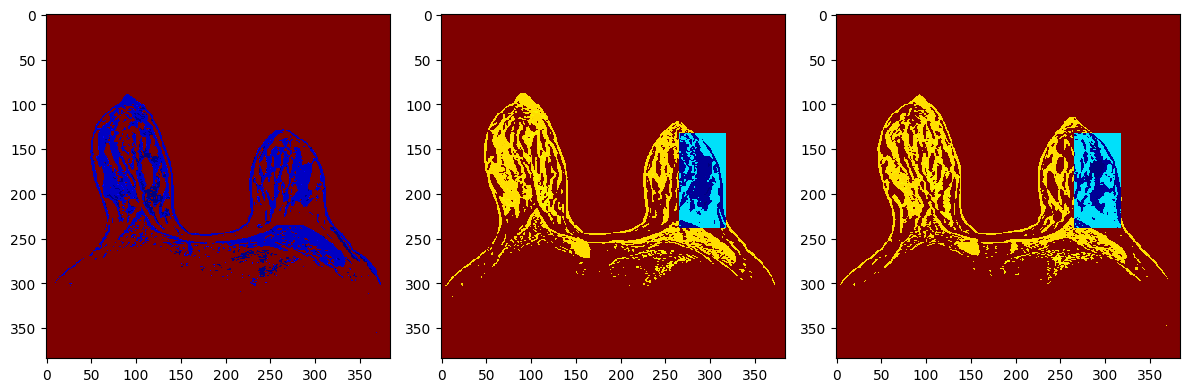

In [380]:
idx=[75,80,85]
show_n_images([mask_dcm.pixel_array[i] for i in idx],cmap='jet')

<Figure size 640x480 with 0 Axes>

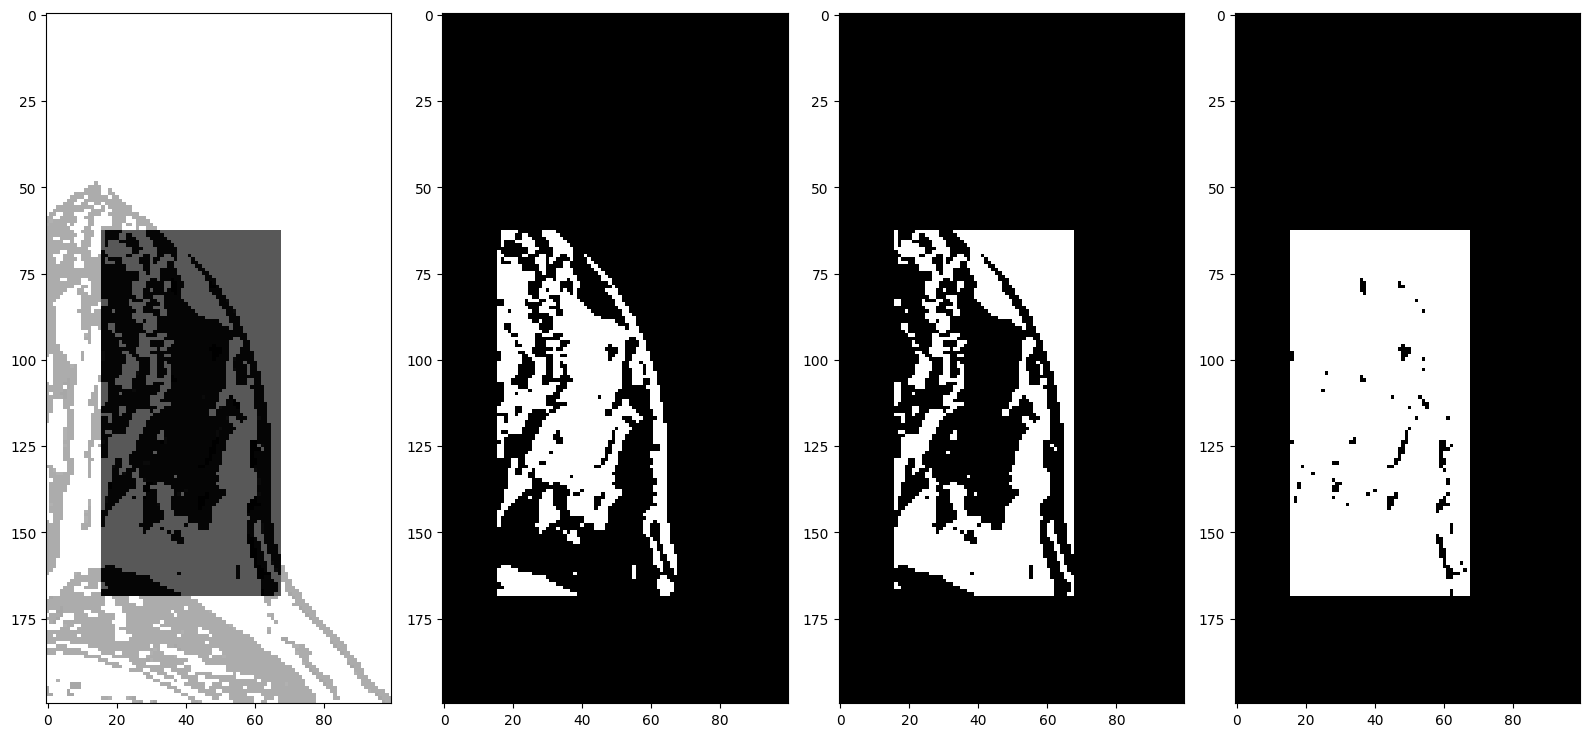

In [381]:
im=mask_dcm.pixel_array[80][70:270,250:350].copy()
im1 = np.where(im==1,1,0)
im2 = np.where(im==17,1,0)
im3 = np.where((im==17 )| (im==1),1,0)
show_n_images([mask_dcm.pixel_array[80][70:270,250:350],im1,im2,im3])

In [382]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gray level to RGB mapping
gray_to_rgb = {
    0: (0, 0, 0),         # Black
    1: (255, 0, 0),       # Red
    2: (0, 255, 0),       # Green
    17: (0, 0, 255),      # Blue
    32: (255, 255, 0),    # Yellow
    33: (255, 0, 255),    # Magenta
    34: (0, 255, 255),    # Cyan
    49: (128, 128, 128)   # Gray
}

# Sample 2D NumPy array (replace with your data)
gray_image = mask_dcm.pixel_array[80].copy()

def map_mask_colors(gray_image):

    # Create an empty RGB image
    rgb_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)

    # Apply the mapping
    for gray_value, rgb_color in gray_to_rgb.items():
        rgb_image[gray_image == gray_value] = rgb_color
    return rgb_image


<Figure size 640x480 with 0 Axes>

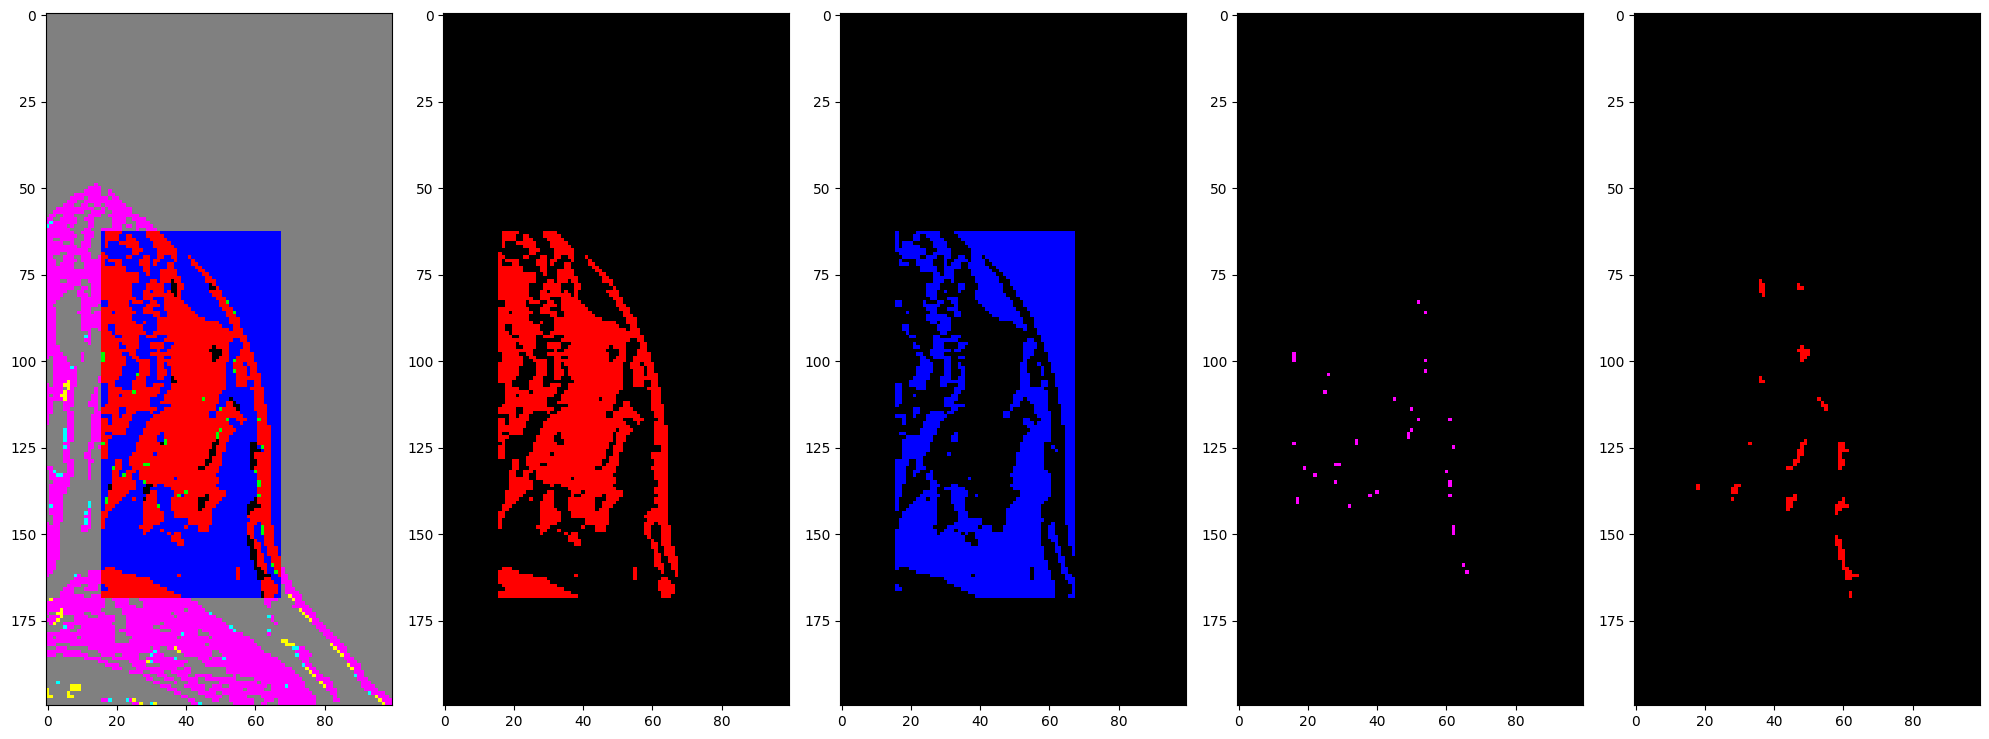

In [383]:
im=mask_dcm.pixel_array[80][70:270,250:350].copy()
im1 = np.where(im==1,1,0)
im2 = np.where(im==0,1,0)
im3 = np.where(im==17,17,0)
im4 = np.where(im==2,33,0)
show_n_images([map_mask_colors(im), map_mask_colors(im1),
               map_mask_colors(im3), map_mask_colors(im4),map_mask_colors(im2)])

<Figure size 640x480 with 0 Axes>

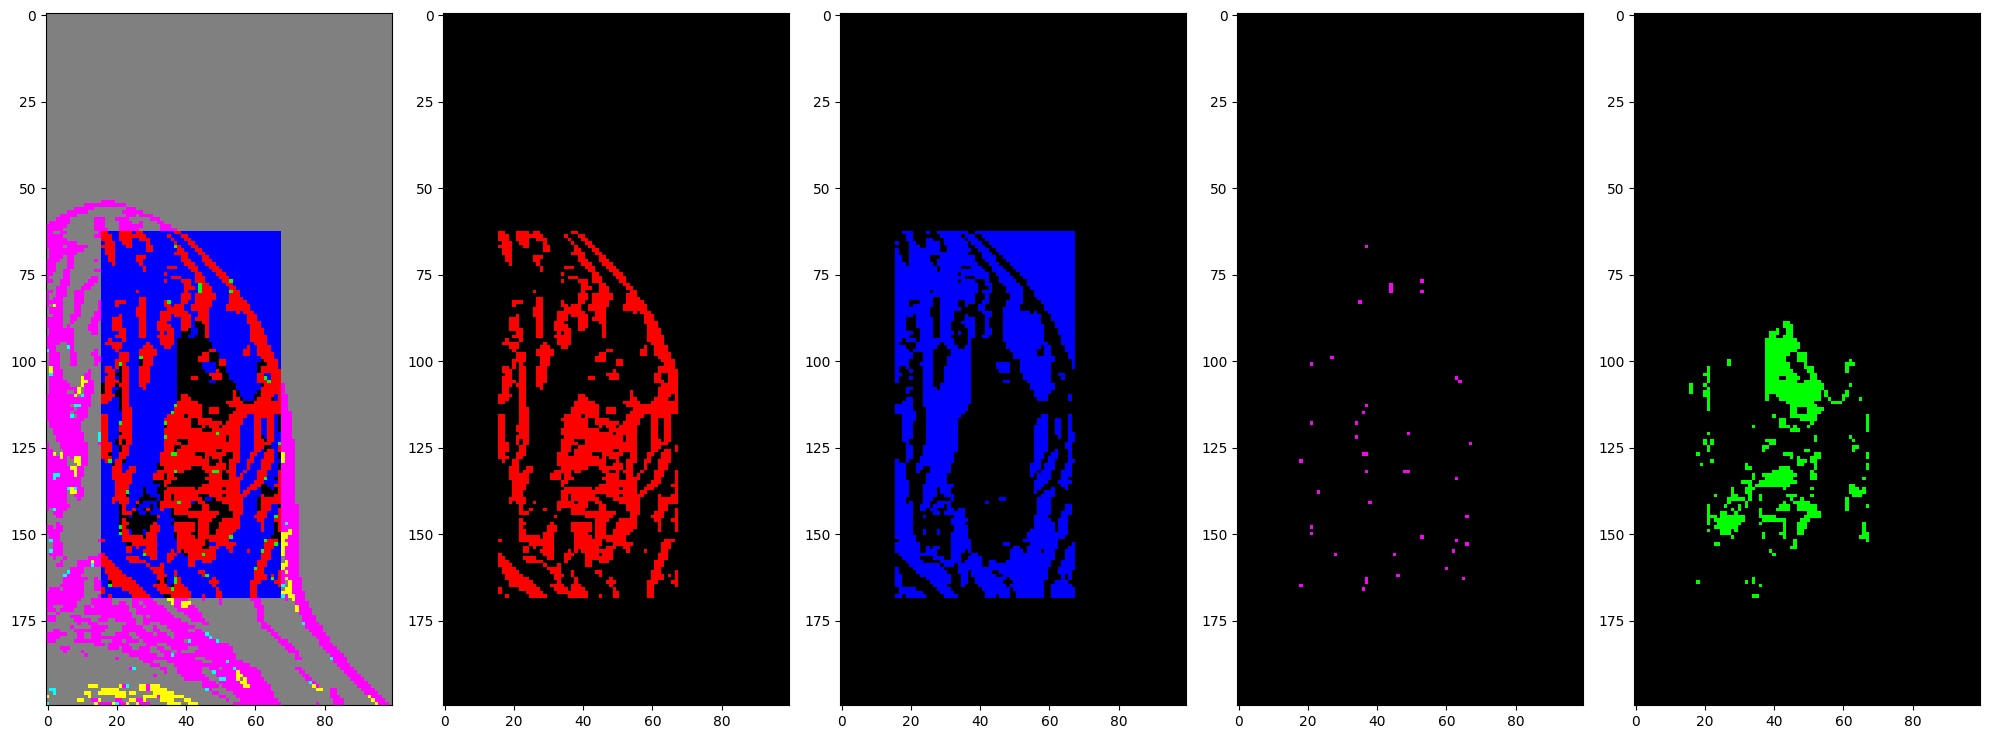

In [400]:
im=mask_dcm.pixel_array[160-62][70:270,250:350].copy()
im1 = np.where(im==1,1,0)
im2 = np.where(im==0,2,0)
im3 = np.where(im==17,17,0)
im4 = np.where(im==2,33,0)
show_n_images([map_mask_colors(im), map_mask_colors(im1),
               map_mask_colors(im3), map_mask_colors(im4),map_mask_colors(im2)])

In [385]:
np.unique(mask_dcm.pixel_array.flatten())

array([ 0,  1,  2, 17, 32, 33, 34, 49], dtype=uint8)

## Organizing DCE-MRI Slices of all acquisitions by Z-Axis Position

We observe that the slices are ordered along the **Z-axis**, ranging from `-78.41953` to `80.58047`. Using this information, we can correctly **organize all 1120 DCE-MRI slices** into their respective positions.

### **Steps for Organizing Slices**
1. **Initialize Storage Arrays**  
   - We create **7 zero arrays** (one for each acquisition), each with a shape of `(160, 384, 384)`, corresponding to **160 slices per acquisition**.

2. **Assign Slices to Their Correct Positions**  
   - We iterate through all slices and **insert each slice** into its appropriate position based on its **Z-location**.

This structured approach ensures that the DCE-MRI dataset is accurately **reconstructed in spatial order**.
To keep coherence, we sort all mri slices of mask and acuisition in an increasing order.

# --------------------------------------------------------------------------------------------------
#     Orgenize data downloaded from tcia with csv  files
* Top use rhis code, you need to download data from TCAI
* org_path is the path to where you downloada the data

In [386]:
org_path = "D:\\SPY\\manifest-1636041418053\\"

In [387]:
csv_path = os.path.join('ISPY2','data_sample','csv')

In [388]:
df_csv = pd.read_csv(os.path.join(csv_path, 'ISPY2-550421_dcm_croped.csv'))
df_csv.head(2)

,pid,vis,fname,org_idx,location,pat_pos_x,pat_pos_y,pat_pos_z,in_stack_pos,Acq_tm,...,pix_type,FirstPostIndex,CropSourceNPixels,CropTargetNPixels,CropPixelLimitsStart,CropPixelLimitsEnd,dirname,adj_Acq_tm,adj_Cont_tm,org_dirname
0,ISPY2-550421,vis1,1-0160.dcm,159,372.00000,-20.22849,-133.18981,-96.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
1,ISPY2-550421,vis1,1-0159.dcm,158,371.00000,-20.22849,-133.18981,-95.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...


In [389]:
### temporal_id is index of acquisition

In [390]:
df_csv.columns

Index(['pid', 'vis', 'fname', 'org_idx', 'location', 'pat_pos_x', 'pat_pos_y',
       'pat_pos_z', 'in_stack_pos', 'Acq_tm', 'Cont_tm', 'n_aqc',
       'temporal_id', 'pix_h', 'pix_w', 'n_tmp_pos_post', 'n_tmp_pos_total',
       'lut', 'intercept', 'slope', 'pix_type', 'FirstPostIndex',
       'CropSourceNPixels', 'CropTargetNPixels', 'CropPixelLimitsStart',
       'CropPixelLimitsEnd', 'dirname', 'adj_Acq_tm', 'adj_Cont_tm',
       'org_dirname'],
      dtype='object')

In [391]:
df_csv.temporal_id.value_counts()

,count
temporal_id,
0,160
1,160
2,160
3,160
4,160
5,160
6,160


In [392]:
## Ge

In [393]:
df_acquisition_0 = df_csv[df_csv.temporal_id==0].copy()
df_acquisition_0

,pid,vis,fname,org_idx,location,pat_pos_x,pat_pos_y,pat_pos_z,in_stack_pos,Acq_tm,...,pix_type,FirstPostIndex,CropSourceNPixels,CropTargetNPixels,CropPixelLimitsStart,CropPixelLimitsEnd,dirname,adj_Acq_tm,adj_Cont_tm,org_dirname
0,ISPY2-550421,vis1,1-0160.dcm,159,372.00000,-20.22849,-133.18981,-96.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
1,ISPY2-550421,vis1,1-0159.dcm,158,371.00000,-20.22849,-133.18981,-95.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
2,ISPY2-550421,vis1,1-0158.dcm,157,370.00000,-20.22849,-133.18981,-94.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
3,ISPY2-550421,vis1,1-0157.dcm,156,369.00000,-20.22849,-133.18981,-93.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
4,ISPY2-550421,vis1,1-0156.dcm,155,368.00000,-20.22849,-133.18981,-92.86446,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211400,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,ISPY2-550421,vis1,1-0005.dcm,4,217.00000,-20.22849,-133.18981,58.13554,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211356,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
156,ISPY2-550421,vis1,1-0004.dcm,3,216.00000,-20.22849,-133.18981,59.13554,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211356,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
157,ISPY2-550421,vis1,1-0003.dcm,2,215.00000,-20.22849,-133.18981,60.13554,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211356,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...
158,ISPY2-550421,vis1,1-0002.dcm,1,214.00000,-20.22849,-133.18981,61.13554,NaN,73003,...,uint16,1,"[512, 512, 214]","[256, 256, 160]","[233, 99, 48]","[488, 354, 207]",.\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...,73003,211356,.\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...


In [394]:
org_path

'D:\\SPY\\manifest-1636041418053\\'

In [395]:
if os.path.exists(org_path):

    dcm_0=np.zeros((160,256,256))
    df_acquisition_0 = df_csv[df_csv.temporal_id==0].copy()
    df_acquisition_0 = df_acquisition_0.sort_values('pat_pos_z').reset_index(drop=True)
    for i,row in df_acquisition_0.iterrows():
        p = row['pid']
        dname = row['org_dirname']
        fname = row['fname']
        x = pydicom.dcmread(os.path.join(join_path(org_path, dname), fname))

        dcm_0[i] = x.pixel_array

In [396]:
if os.path.exists(org_path):

    dcm_2=np.zeros((160,256,256))
    df_acquisition_2 = df_csv[df_csv.temporal_id==2].copy()
    df_acquisition_2 = df_acquisition_2.sort_values('pat_pos_z').reset_index(drop=True)
    for i,row in df_acquisition_2.iterrows():
        p = row['pid']
        dname = row['org_dirname']
        fname = row['fname']
        x = pydicom.dcmread(os.path.join(org_path, dname, fname))

        dcm_2[i] = x.pixel_array

In [397]:
if os.path.exists(org_path):

    dcm_6=np.zeros((160,256,256))
    df_acquisition_6 = df_csv[df_csv.temporal_id==6].copy()
    df_acquisition_6 = df_acquisition_6.sort_values('pat_pos_z').reset_index(drop=True)
    for i,row in df_acquisition_6.iterrows():
        p = row['pid']
        dname = row['org_dirname']
        fname = row['fname']
        x = pydicom.dcmread(os.path.join(join_path(org_path, dname), fname))

        dcm_6[i] = x.pixel_array

### 🔷 Visualizing SER Acquisitions

We visualize the following **Signal Enhancement Ratio (SER) acquisitions**:

- **0** → 🔷 **Pre-injection** (Before contrast administration)  
- **2** → 🔷 **Post-early** (Early-phase post-contrast)  
- **6** → 🔷 **Post-late** (Late-phase post-contrast)  

This helps analyze the **contrast uptake dynamics** across different time points.


In [398]:
idx=[70,80,90]

if os.path.exists(org_path):

    show_n_images([dcm_0[i] for i in idx], titles=['Scan Pre plane '+str(i) for i in idx])
    show_n_images([dcm_2[i] for i in idx], titles=['Scan post early (2)  plane '+str(i) for i in idx])
    show_n_images([dcm_6[i] for i in idx], titles=['Scan post late (6)  plane '+str(i) for i in idx])
    show_n_images([np.stack([minmax(dcm_0[i]),
                             m[i]/m.max(),m[i]/m.max()],axis=2) for i in idx],
                  titles=['mask on DCE plane '+str(i) for i in idx])